In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Valens\Documents\Python Anaconda\Instacart Basket Analysis'

In [3]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_with_category_with_flag_customer.pkl'))


In [4]:
ords_prods_cust.shape

(32404859, 34)

In [5]:
# allowing us to view tha maximum column
pd.options.display.max_columns = None

In [6]:
# allowing us to view tha maximum row
pd.options.display.max_rows = None

In [7]:
ords_prods_cust.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,people_supported_financially,fam_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,median_of_days_since_prior_order,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.0,443895,2543867,5,1,9,30.0,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.0,443897,1285508,7,5,15,11.0,1,1,Mid-range product,Regularly busy days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.0,443898,2578584,8,1,15,10.0,2,1,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.3,443891,518967,1,2,9,0.0,1,0,Low-range product,Regularly busy days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.3,443893,2524893,3,3,11,30.0,2,1,Low-range product,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both


# Question 2
# With this data there are some data in the list is very sensitive such as income, marital status, their spending behaviour and many others. This is why is very important for us to treat the consumer details carefully since the data is very sensitive.

# Question 3

In [8]:
# Creating criteria in different region
region_list = []
for value in ords_prods_cust['STATE']:
  if value in('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
    region_list.append('Region 1 - Northeast')
  elif value in('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
    region_list.append('Region 2 - Midwest')
  elif value in('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
    region_list.append('Region 3 - South')
  elif value in('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah','Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
    region_list.append('Region 4 - West')
  else:
    region_list.append('Region not indicated') 


In [9]:
region_list

['Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 2 - Midwest',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Region 4 - West',
 'Regi

In [10]:
ords_prods_cust['Region'] = region_list

In [11]:
# To check whether the data as it suppose to be 
ords_prods_cust['Region'].value_counts(dropna = False)

Region 3 - South        10791885
Region 4 - West          8292913
Region 2 - Midwest       7597325
Region 1 - Northeast     5722736
Name: Region, dtype: int64

In [12]:
crosstab = pd.crosstab(ords_prods_cust['Region'], ords_prods_cust['spending_flag'], dropna = False)
crosstab.to_clipboard()

In [13]:
crosstab

spending_flag,High Spender,Low Spender
Region,,
Region 1 - Northeast,108200,5614536
Region 2 - Midwest,155975,7441350
Region 3 - South,209610,10582275
Region 4 - West,160328,8132585


# Based on the result above there is only a slight different between them their spending

# Question 4

In [14]:
# Create an order flag 
order_flag = []
for value in ords_prods_cust['order_number']:
    if value < 5:
        order_flag.append('Low-Activity Customer')
    else:
        order_flag.append('Regular/High activity Customer')

    

In [15]:
order_flag

['Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Low-Activity Customer',
 'Low-Activity Customer',
 'Low-Activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Low-Activity Customer',
 'Low-Activity Customer',
 'Low-Activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Low-Activity Customer',
 'Low-Activity Customer',
 'Low-Activity Customer',
 'Regular/High activity Customer',
 'Low-Activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Low-Activity Customer',
 'Regular/High activity Customer',
 'Regular/High activity Customer',
 'Low-Activity

In [16]:
#Creating a new column to differentiate between low and regular/high activity customer
ords_prods_cust['Customer Order Activity'] = order_flag

In [17]:
# To see if there is any unexpected result
ords_prods_cust['Customer Order Activity'].value_counts(dropna=False)

Regular/High activity Customer    24414877
Low-Activity Customer              7989982
Name: Customer Order Activity, dtype: int64

In [18]:
ords_prods_cust.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,people_supported_financially,fam_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,median_of_days_since_prior_order,frequency_flag,_merge,Region,Customer Order Activity
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.0,443895,2543867,5,1,9,30.0,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.0,443897,1285508,7,5,15,11.0,1,1,Mid-range product,Regularly busy days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.0,443898,2578584,8,1,15,10.0,2,1,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.3,443891,518967,1,2,9,0.0,1,0,Low-range product,Regularly busy days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Region 2 - Midwest,Low-Activity Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.3,443893,2524893,3,3,11,30.0,2,1,Low-range product,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Region 2 - Midwest,Low-Activity Customer


In [19]:
# Creating a new table without low activity customer
ords_prods_cust_high_activity = ords_prods_cust[ords_prods_cust['Customer Order Activity']=='Regular/High activity Customer']

In [20]:
#To check on what is the lowest order#
ords_prods_cust_low_activity = ords_prods_cust[ords_prods_cust['Customer Order Activity']=='Low-Activity Customer']

In [21]:
ords_prods_cust_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Customer with high activity order.pkl'))

In [22]:
ords_prods_cust_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Customer with low activity order.pkl'))

In [23]:
ords_prods_cust_high_activity['order_number'].min()

5

# Question 5 & 6

## Busiest hours of the day 

In [24]:
# Counting the busiest time of the day
ords_prods_cust_high_activity['order_hour_of_day'].value_counts()

10    2119103
11    2070794
14    2018254
13    1997116
15    1988057
12    1961666
9     1909015
16    1880003
17    1533831
8     1349840
18    1192690
19     919242
20     724980
7      704807
21     601378
22     477020
23     300281
6      227981
0      160533
1       83352
5       67956
2       50025
4       39660
3       37293
Name: order_hour_of_day, dtype: int64

Text(0.5, 1.0, 'Busiest hour of the day')

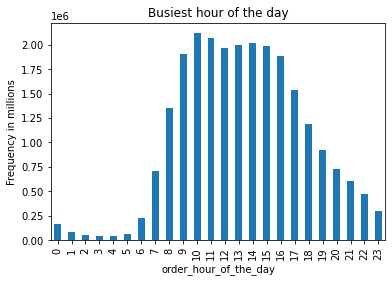

In [25]:
# Creating bar graph of the busiest day
bar_hours_day_activity =  ords_prods_cust_high_activity['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.xlabel('order_hour_of_the_day')
plt.ylabel('Frequency in millions')
plt.title('Busiest hour of the day')

In [26]:
bar_hours_day_activity.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hours_day_activity.png'))

## Busiest time of the week 

In [27]:
# Calculating the busiest time of the week
ords_prods_cust_high_activity['orders_day_of_week'].value_counts()

0    4602223
1    4274141
6    3350443
5    3217197
2    3174374
3    2906674
4    2889825
Name: orders_day_of_week, dtype: int64

In [28]:
# Chang the number in column to days
order_day = []
for value in ords_prods_cust_high_activity['orders_day_of_week']:
  if value == 0:
    order_day.append('Saturday')
  elif value == 1:
    order_day.append('Sunday')
  elif value == 2:
    order_day.append('Monday')
  elif value == 3:
    order_day.append('Tuesday')
  elif value == 4:
    order_day.append('Wednesday')
  elif value == 5:
    order_day.append('Thursday')
  elif value == 6:
    order_day.append('Friday')
  else:
    order_day.append('not indicated') 


In [29]:
ords_prods_cust_high_activity['Day'] = order_day

<ipython-input-29-24aab17f1273>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_high_activity['Day'] = order_day


In [30]:
#Calculating the busiest day of the week
ords_prods_cust_high_activity['Day'].value_counts()

Saturday     4602223
Sunday       4274141
Friday       3350443
Thursday     3217197
Monday       3174374
Tuesday      2906674
Wednesday    2889825
Name: Day, dtype: int64

Text(0.5, 1.0, 'Busiest day of the week')

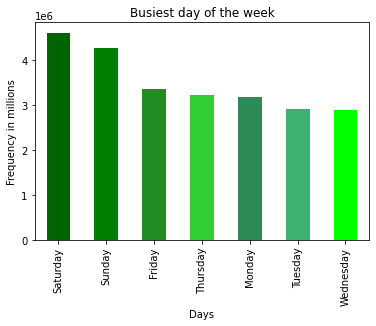

In [31]:
bar_day_week_activity =  ords_prods_cust_high_activity['Day'].value_counts().plot.bar(color = ['darkgreen','green','forestgreen','limegreen','seagreen','mediumseagreen','lime'])
plt.xlabel('Days')
plt.ylabel('Frequency in millions')
plt.title('Busiest day of the week')

In [32]:
bar_day_week_activity.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_week_activity.png'))

## Particular time of the day when people spend the most money

In [33]:
pd.options.display.float_format = '{:,.2f}'.format

In [34]:
df_sum_prices_ord_hour=ords_prods_cust_high_activity.groupby('order_hour_of_day').agg({'prices': ['sum']})

In [35]:
df_sum_prices_ord_hour

,prices
,sum
order_hour_of_day,
0,"1,255,169.50"
1,"650,323.50"
2,"390,606.20"
3,"292,325.60"
4,"310,651.00"
5,"532,451.90"
6,"1,783,791.20"
7,"5,513,864.60"


Text(0.5, 1.0, 'The time when people spend the most money')

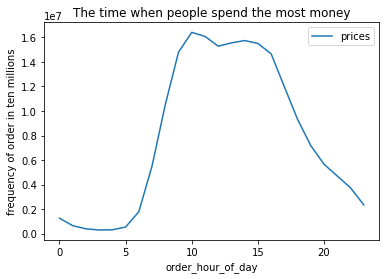

In [36]:
# Create a line chart for the 30% of the data between prices and order hour of the day
line_test = sns.lineplot(data = df_sum_prices_ord_hour)
plt.ylabel('frequency of order in ten millions')
plt.title('The time when people spend the most money')

In [37]:
line_test.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_test.png'))

## The most popular range of product

In [38]:
#Calculating the most popular range of product
ords_prods_cust_high_activity['price_range_loc'].value_counts()

Mid-range product     16479445
Low-range product      7626745
High-range product      308687
Name: price_range_loc, dtype: int64

Text(0.5, 1.0, 'Proportion of different product type')

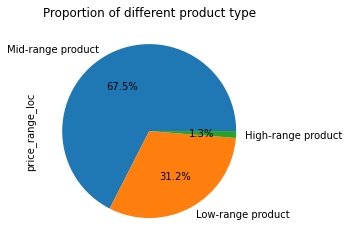

In [39]:
# creating a pie chart
pie_range_product = ords_prods_cust_high_activity['price_range_loc'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of different product type')

In [40]:
pie_range_product.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_range_product.png'))

## The most popular departments

Text(0.5, 0, 'department_id')

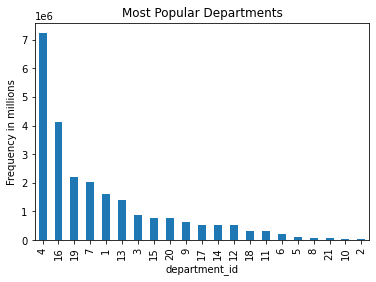

In [41]:
bar_dep = ords_prods_cust_high_activity['department_id'].value_counts().plot.bar()
plt.title('Most Popular Departments')
plt.ylabel('Frequency in millions')
plt.xlabel('department_id')


In [42]:
bar_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep.png'))

## The distribution of our customers base on loyalty

In [43]:
ords_prods_cust_high_activity['loyalty_flag'].value_counts()

Regular customer    12744558
Loyal customer       9555491
New customer         2114828
Name: loyalty_flag, dtype: int64

Text(0.5, 1.0, 'Customer base on loyalty')

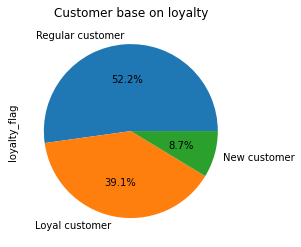

In [44]:
# creating a pie chart
pie_range_product = ords_prods_cust_high_activity['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Customer base on loyalty')

In [45]:
pie_range_product.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_range_product.png'))

## The difference of ordering habis base on customer loyalty

In [46]:
crosstab_loyalty_order = pd.crosstab(ords_prods_cust_high_activity['loyalty_flag'], ords_prods_cust_high_activity['max_order'], dropna = False)

In [47]:
df_sum_ord_loyalty=ords_prods_cust_high_activity.groupby('loyalty_flag').agg({'max_order': ['sum']})

In [48]:
df_sum_ord_loyalty

,max_order
,sum
loyalty_flag,
Loyal customer,614688674
New customer,16928365
Regular customer,308071422


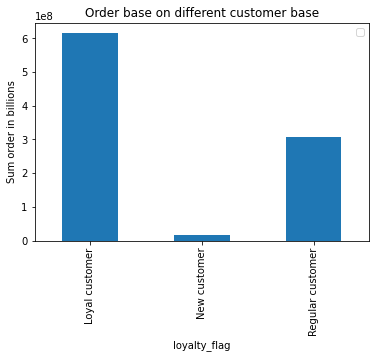

In [49]:
bar_sum_ord_loyalty = df_sum_ord_loyalty.plot.bar().get_legend()
plt.ylabel('Sum order in billions')
plt.title('Order base on different customer base')
plt.legend('')

In [50]:
bar_sum_ord_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sum_ord_loyalty.png'))

## Difference ordering habits between region

In [51]:
df_sum_ord_region=ords_prods_cust_high_activity.groupby('Region').agg({'max_order': ['sum']})

In [52]:
df_sum_ord_region

,max_order
,sum
Region,
Region 1 - Northeast,166823039
Region 2 - Midwest,216811822
Region 3 - South,313339952
Region 4 - West,242713648


Text(0.5, 1.0, 'Order base on different region')

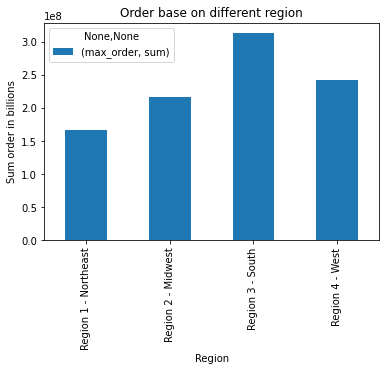

In [53]:
bar_sum_ord_region = df_sum_ord_region.plot.bar().get_legend()
plt.ylabel('Sum order in billions')
plt.title('Order base on different region')

In [54]:
bar_sum_ord_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_range.png'))

## connection between age and family status in terms of ordering habits

In [55]:
# different age group category base on this https://www.kasasa.com/exchange/articles/generations/gen-x-gen-y-gen-z & https://libguides.usc.edu/busdem/age
age_category = []
for value in ords_prods_cust_high_activity['Age']:
    if value <= 24:
        age_category.append('Gen Z')
    elif value <= 40 and value >=25:
        age_category.append('Gen Y')
    elif value <=56  and value >=41 :
        age_category.append('Gen X')
    elif value <=75  and value >=57 :
        age_category.append('Baby Boomers')
    else:
         age_category.append('Silent_generation')
            

    

In [56]:
# adding a new column
ords_prods_cust_high_activity['Age_Group'] = age_category

<ipython-input-56-0aec6b1ac54c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_high_activity['Age_Group'] = age_category


In [57]:
ords_prods_cust_high_activity['Age_Group'].value_counts()

Baby Boomers         7167419
Gen X                6152808
Gen Y                6104959
Gen Z                2694733
Silent_generation    2294958
Name: Age_Group, dtype: int64

In [58]:
crosstab_fam_dep = pd.crosstab(ords_prods_cust_high_activity['department_id'], ords_prods_cust_high_activity['fam_status'], dropna = False)

In [59]:
crosstab_fam_dep.to_clipboard()

In [60]:
crosstab_fam_dep

fam_status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
1,141623,79512,1142589,263890
2,2267,1460,18771,4668
3,75587,42543,619188,146012
4,619577,343702,5070504,1193308
5,8936,6284,73729,19023
6,16965,9659,138203,33073
7,175452,94324,1430068,336603
8,6262,4190,49671,11988
9,54174,30606,445705,103240


In [61]:
crosstab_age_dep = pd.crosstab(ords_prods_cust_high_activity['Age_Group'], ords_prods_cust_high_activity['department_id'], dropna = False)

In [62]:
crosstab_age_dep.to_clipboard()

In [63]:
crosstab_age_dep

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Age_Group,,,,,,,,,,,,,,,,,,,,,
Baby Boomers,478846,7908,258366,2126693,31358,57250,603294,20493,185720,8025,95984,155376,408663,151926,230690,1207822,158134,97231,636432,230613,16595
Gen X,410782,6850,224038,1813480,26571,49786,515525,18271,160105,6957,84000,131391,350607,134026,198549,1036251,136284,87521,550486,196635,14693
Gen Y,403029,6797,220001,1811683,27208,50092,503949,17186,157682,6819,82015,128750,344001,130275,198337,1035809,134368,83591,552282,196655,14430
Gen Z,179519,3119,97443,796076,13152,22071,221178,8757,70900,3123,36048,58665,153083,59393,86764,456966,59392,37112,239844,85515,6613
Silent_generation,155438,2492,83482,679159,9683,18701,192501,7404,59318,2634,30433,49708,129021,49325,73450,383640,51171,30492,208077,73593,5236


In [64]:
crosstab_age_fam = pd.crosstab(ords_prods_cust_high_activity['Age_Group'], ords_prods_cust_high_activity['fam_status'], dropna = False)

In [65]:
crosstab_age_fam.to_clipboard()

In [66]:
crosstab_age_fam

fam_status,divorced/widowed,living with parents and siblings,married,single
Age_Group,,,,
Baby Boomers,1517799,0,5342550,307070
Gen X,0,0,4630032,1522776
Gen Y,0,0,4566200,1538759
Gen Z,0,1171399,876149,647185
Silent_generation,571413,0,1723545,0


## Classifications demographic

### Classification on income

In [67]:
# Creating an income group within the range below
income_group = []
for value in ords_prods_cust_high_activity['income']:
    if value <= 75000:
        income_group.append('Low income')
    elif value >= 75000 and value <=125000:
        income_group.append('Middle Income')
    else:
         income_group.append('High Income')
            

In [68]:
ords_prods_cust_high_activity['Income_range'] = income_group

<ipython-input-68-551da6552a36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_high_activity['Income_range'] = income_group


In [69]:
ords_prods_cust_high_activity['Income_range'].value_counts()

Middle Income    10108551
Low income        7768591
High Income       6537735
Name: Income_range, dtype: int64

Text(0.5, 1.0, 'Frequency of the income range')

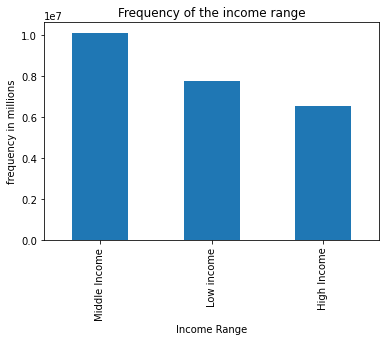

In [70]:
bar_income_range = ords_prods_cust_high_activity['Income_range'].value_counts().plot.bar()
plt.ylabel('frequency in millions')
plt.xlabel('Income Range')
plt.title('Frequency of the income range')

In [71]:
bar_income_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_range.png'))

Text(0.5, 1.0, 'Proportion of Income Range')

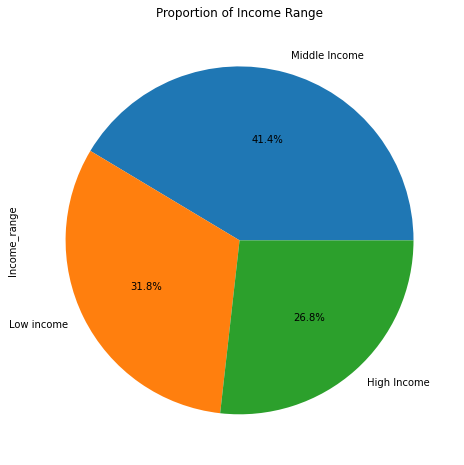

In [141]:
pie_income_range = ords_prods_cust_high_activity['Income_range'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Income Range')

In [142]:
pie_income_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_income_range.png'))

In [72]:
crosstab_age_income = pd.crosstab(ords_prods_cust_high_activity['Age_Group'], ords_prods_cust_high_activity['Income_range'], dropna = False)

In [73]:
crosstab_age_income.to_clipboard()

In [74]:
crosstab_age_income


Income_range,High Income,Low income,Middle Income
Age_Group,,,
Baby Boomers,2950989,1065749,3150681
Gen X,2528945,939539,2684324
Gen Y,75084,3769158,2260717
Gen Z,34612,1632347,1027774
Silent_generation,948105,361798,985055


In [75]:
crosstab_age_income.to_clipboard()

Text(0.5, 1.0, 'Frequency of the income range')

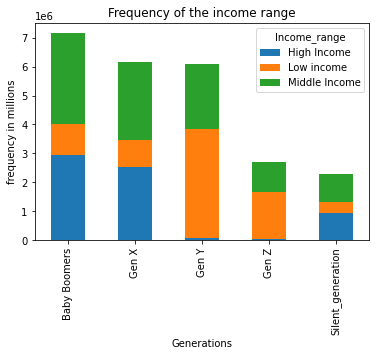

In [76]:
bar_income_age = crosstab_age_income.plot.bar(stacked = True)
plt.ylabel('frequency in millions')
plt.xlabel('Generations')
plt.title('Frequency of the income range')

### Classification on parental status

In [77]:
ords_prods_cust_high_activity.loc[ords_prods_cust_high_activity['people_supported_financially'] > 0, 'parent_status'] = 'Parent'

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [78]:
ords_prods_cust_high_activity.loc[ords_prods_cust_high_activity['people_supported_financially'] <= 0, 'parent_status'] = 'Not a Parent'

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
ords_prods_cust_high_activity['parent_status'].value_counts()

Parent          18309875
Not a Parent     6105002
Name: parent_status, dtype: int64

Text(0.5, 1.0, 'Proportion of the parental status')

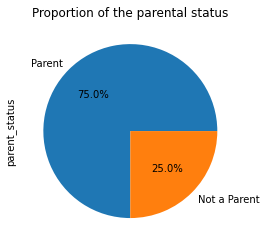

In [80]:
pie_parental_status = ords_prods_cust_high_activity['parent_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of the parental status')

In [81]:
pie_parental_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_parental_status.png'))

## Differences in ordering habits for different customer profile

In [82]:
ords_prods_cust_high_activity.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,people_supported_financially,fam_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,median_of_days_since_prior_order,frequency_flag,_merge,Region,Customer Order Activity,Day,Age_Group,Income_range,parent_status
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443895,2543867,5,1,9,30.00,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443897,1285508,7,5,15,11.00,1,1,Mid-range product,Regularly busy days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Thursday,Gen X,High Income,Parent
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443898,2578584,8,1,15,10.00,2,1,Mid-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.30,443895,2543867,5,1,9,30.00,1,1,Low-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.30,443896,2505178,6,1,8,21.00,1,1,Low-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent


### Age and price of orders

In [83]:
crosstab_age_price = pd.crosstab(ords_prods_cust_high_activity['Age_Group'], ords_prods_cust_high_activity['spending_flag'], dropna = False)

In [84]:
crosstab_age_price

spending_flag,High Spender,Low Spender
Age_Group,,
Baby Boomers,137561,7029858
Gen X,129019,6023789
Gen Y,113589,5991370
Gen Z,53531,2641202
Silent_generation,49029,2245929


In [85]:
crosstab_age_price.to_clipboard()

Text(0.5, 1.0, 'Order base on different age group')

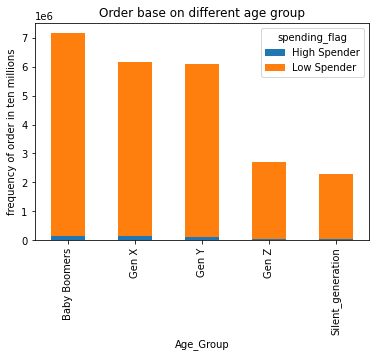

In [86]:
bar_age_price = crosstab_age_price.plot.bar(stacked= True)
plt.ylabel('frequency of order in ten millions')
plt.title('Order base on different age group')

In [87]:
bar_age_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_price.png'))

### Age and department ID

In [88]:
crosstab_age_department = pd.crosstab(ords_prods_cust_high_activity['department_id'], ords_prods_cust_high_activity['Age_Group'], dropna = False)

In [89]:
crosstab_age_department.to_clipboard()

In [90]:
crosstab_age_department

Age_Group,Baby Boomers,Gen X,Gen Y,Gen Z,Silent_generation
department_id,,,,,
1,478846,410782,403029,179519,155438
2,7908,6850,6797,3119,2492
3,258366,224038,220001,97443,83482
4,2126693,1813480,1811683,796076,679159
5,31358,26571,27208,13152,9683
6,57250,49786,50092,22071,18701
7,603294,515525,503949,221178,192501
8,20493,18271,17186,8757,7404
9,185720,160105,157682,70900,59318


In [91]:
crosstab_age_department.to_clipboard()

Text(0.5, 1.0, 'Most popular Departments base on Age group')

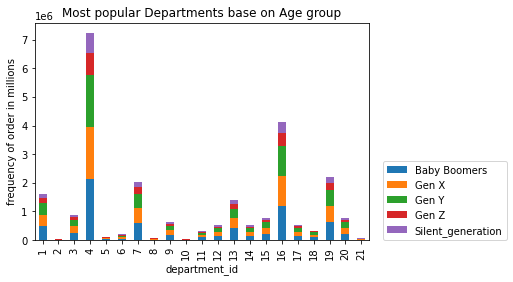

In [92]:
bar_age_department = crosstab_age_department.plot.bar(stacked= True).legend(loc=(1.04,0))
plt.ylabel('frequency of order in millions')
plt.title('Most popular Departments base on Age group')

In [93]:
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_department.png'))

In [94]:
ords_prods_cust_high_activity.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,people_supported_financially,fam_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,median_of_days_since_prior_order,frequency_flag,_merge,Region,Customer Order Activity,Day,Age_Group,Income_range,parent_status
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443895,2543867,5,1,9,30.00,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443897,1285508,7,5,15,11.00,1,1,Mid-range product,Regularly busy days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Thursday,Gen X,High Income,Parent
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443898,2578584,8,1,15,10.00,2,1,Mid-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.30,443895,2543867,5,1,9,30.00,1,1,Low-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.30,443896,2505178,6,1,8,21.00,1,1,Low-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent


### Income_range and spending

In [95]:
crosstab_income_price = pd.crosstab(ords_prods_cust_high_activity['Income_range'], ords_prods_cust_high_activity['spending_flag'], dropna = False)

In [96]:
crosstab_income_price.to_clipboard()

In [97]:
crosstab_income_price

spending_flag,High Spender,Low Spender
Income_range,,
High Income,374512,6163223
Low income,21640,7746951
Middle Income,86577,10021974


Text(0.5, 1.0, 'Frequency of income range base on spending flag ')

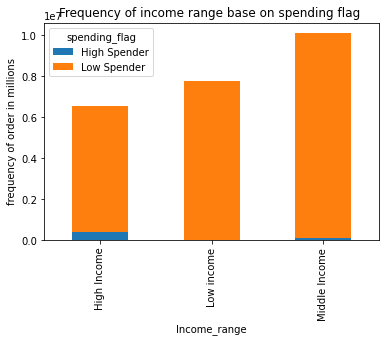

In [98]:
bar_income_price = crosstab_income_price.plot.bar(stacked= True)
plt.ylabel('frequency of order in millions')
plt.title('Frequency of income range base on spending flag ')

In [99]:
bar_income_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_price.png'))

### Income range and department

In [100]:
crosstab_income_department = pd.crosstab(ords_prods_cust_high_activity['department_id'], ords_prods_cust_high_activity['Income_range'], dropna = False)

In [101]:
crosstab_income_department.to_clipboard()

In [102]:
crosstab_income_department

Income_range,High Income,Low income,Middle Income
department_id,,,
1,446192,500859,680563
2,7350,8494,11322
3,245114,267106,371110
4,1954849,2200473,3071769
5,32878,32285,42809
6,54167,58463,85270
7,524110,718658,793679
8,20580,21520,30011
9,175937,182860,274928


Text(0.5, 1.0, 'Most popular Departments base on income range')

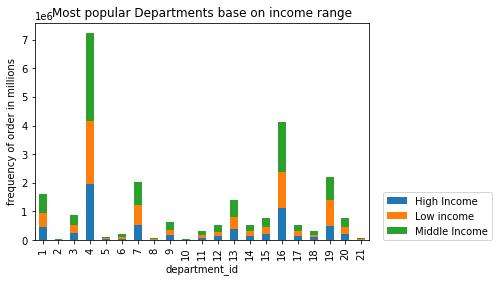

In [103]:
bar_income_department = crosstab_income_department.plot.bar(stacked= True).legend(loc=(1.04,0))
plt.ylabel('frequency of order in millions')
plt.title('Most popular Departments base on income range')

In [104]:
bar_income_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_department.png'))

### Region and Spending

In [105]:
crosstab_region_price = pd.crosstab(ords_prods_cust_high_activity['Region'], ords_prods_cust_high_activity['spending_flag'], dropna = False)

In [106]:
crosstab_region_price.to_clipboard()

In [107]:
crosstab_region_price

spending_flag,High Spender,Low Spender
Region,,
Region 1 - Northeast,82617,4232654
Region 2 - Midwest,119208,5592548
Region 3 - South,159218,7969868
Region 4 - West,121686,6137078


Text(0.5, 1.0, 'The ratio of spending flag between Region')

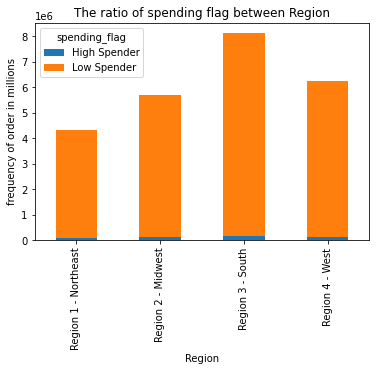

In [108]:
bar_region_price = crosstab_region_price.plot.bar(stacked= True)
plt.ylabel('frequency of order in millions')
plt.title('The ratio of spending flag between Region')

In [109]:
bar_region_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_price.png'))

### Region and department

In [110]:
crosstab_region_department = pd.crosstab(ords_prods_cust_high_activity['department_id'], ords_prods_cust_high_activity['Region'], dropna = False)

In [111]:
crosstab_region_department.to_clipboard()

In [112]:
crosstab_region_department

Region,Region 1 - Northeast,Region 2 - Midwest,Region 3 - South,Region 4 - West
department_id,,,,
1,283259,381094,545809,417452
2,4932,6284,9200,6750
3,157635,205374,292772,227549
4,1269360,1695851,2409221,1852659
5,18534,25567,36253,27618
6,34491,46607,65417,51385
7,367868,472243,680594,515742
8,14080,16481,23012,18538
9,110708,148529,210680,163808


Text(0.5, 1.0, 'Most popular Departments base on Region')

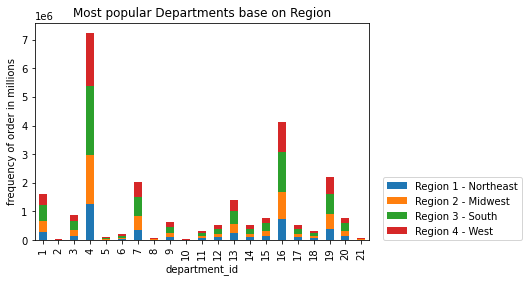

In [113]:
bar_region_department = crosstab_region_department.plot.bar(stacked= True).legend(loc=(1.04,0))
plt.ylabel('frequency of order in millions')
plt.title('Most popular Departments base on Region')

In [114]:
bar_region_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

## Parents and Spending

In [115]:
crosstab_parental_price = pd.crosstab(ords_prods_cust_high_activity['parent_status'], ords_prods_cust_high_activity['spending_flag'], dropna = False)

In [116]:
crosstab_parental_price

spending_flag,High Spender,Low Spender
parent_status,,
Not a Parent,116396,5988606
Parent,366333,17943542


Text(0.5, 1.0, 'The ratio of spending flag between parental status')

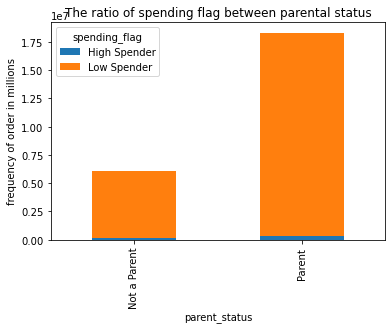

In [117]:
bar_parental_price = crosstab_parental_price.plot.bar(stacked= True)
plt.ylabel('frequency of order in millions')
plt.title('The ratio of spending flag between parental status')

In [118]:
bar_parental_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_price.png'))

## Parents and department ID

In [119]:
crosstab_parental_dep = pd.crosstab(ords_prods_cust_high_activity['department_id'], ords_prods_cust_high_activity['parent_status'], dropna = False)


In [120]:
crosstab_parental_dep.to_clipboard()

In [121]:
crosstab_parental_dep

parent_status,Not a Parent,Parent
department_id,,
1,405513,1222101
2,6935,20231
3,221599,661731
4,1812885,5414206
5,27959,80013
6,50038,147862
7,512055,1524392
8,18250,53861
9,157414,476311


Text(0.5, 1.0, 'Most popular Departments between parental status')

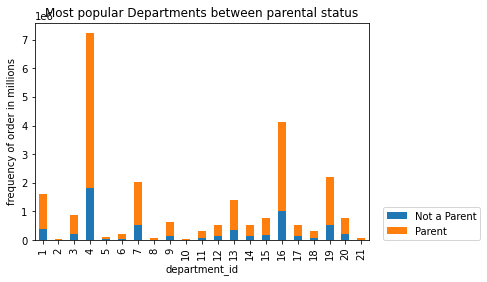

In [122]:
bar_parental_department = crosstab_parental_dep.plot.bar(stacked= True).legend(loc=(1.04,0))
plt.ylabel('frequency of order in millions')
plt.title('Most popular Departments between parental status')

In [123]:
bar_parental_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_department.png'))

## Family Status and Department ID

Text(0.5, 1.0, 'Most popular departments between family status')

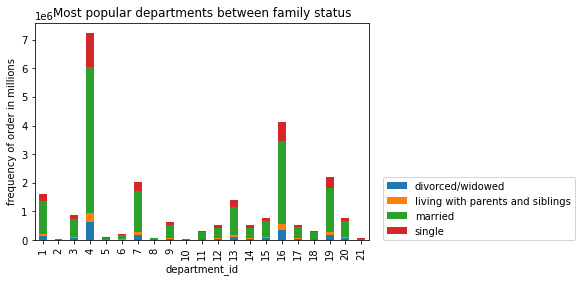

In [124]:
bar_family_department = crosstab_fam_dep.plot.bar(stacked= True).legend(loc=(1.04,0))
plt.ylabel('frequency of order in millions')
plt.title('Most popular departments between family status')

### Busiest hour for different price range product


In [125]:
ords_prods_cust_high_activity.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'people_supported_financially', 'fam_status', 'income',
       'Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0_y', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'max_spender',
       'spending_flag', 'median_of_days_since_prior_order', 'frequency_flag',
       '_merge', 'Region', 'Customer Order Activity', 'Day', 'Age_Group',
       'Income_range', 'parent_status'],
      dtype='object')

In [126]:
crosstab_hr_price = pd.crosstab(ords_prods_cust_high_activity['order_hour_of_day'], ords_prods_cust_high_activity['price_range_loc'], dropna = False)

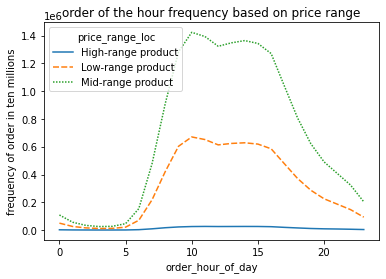

In [127]:
line_crosstab_hr_price = sns.lineplot(data = crosstab_hr_price)
plt.ylabel('frequency of order in ten millions')
plt.title('order of the hour frequency based on price range')
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 8

In [128]:
line_crosstab_hr_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_crosstab_hr_price.png'))

### Busiest day of the week for different price range product

In [129]:
crosstab_day_price = pd.crosstab(ords_prods_cust_high_activity['Day'], ords_prods_cust_high_activity['price_range_loc'], dropna = False)

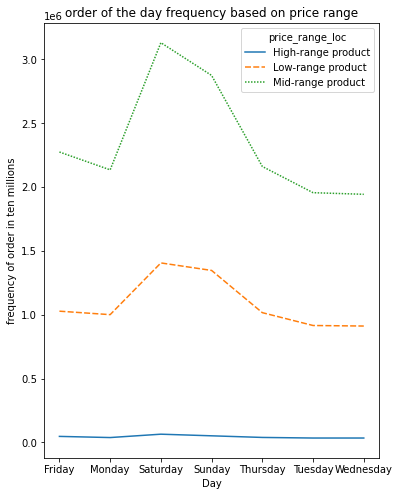

In [130]:
line_crosstab_day_price = sns.lineplot(data = crosstab_day_price)
plt.ylabel('frequency of order in ten millions')
plt.title('order of the day frequency based on price range')
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

In [131]:
line_crosstab_day_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_crosstab_day_price.png'))

# Question 7

In [132]:
ords_prods_cust_high_activity.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,people_supported_financially,fam_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,median_of_days_since_prior_order,frequency_flag,_merge,Region,Customer Order Activity,Day,Age_Group,Income_range,parent_status
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443895,2543867,5,1,9,30.00,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443897,1285508,7,5,15,11.00,1,1,Mid-range product,Regularly busy days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Thursday,Gen X,High Income,Parent
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,196,Soda,77,7,9.00,443898,2578584,8,1,15,10.00,2,1,Mid-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.30,443895,2543867,5,1,9,30.00,1,1,Low-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,Clementines,32,4,4.30,443896,2505178,6,1,8,21.00,1,1,Low-range product,Busiest days,Average orders,8,New customer,7.99,Low Spender,19.00,Regular Customer,both,Region 2 - Midwest,Regular/High activity Customer,Sunday,Gen X,High Income,Parent


### Aggregate prices base on age group

In [133]:
ords_prods_cust_high_activity.groupby('Age_Group').agg({'prices': ['min','max','mean']})

prices           
                     min   max mean
Age_Group                          
Baby Boomers        1.00 25.00 7.80
Gen X               1.00 25.00 7.79
Gen Y               1.00 25.00 7.78
Gen Z               1.00 25.00 7.79
Silent_generation   1.00 25.00 7.79

### Aggregate order hour base on age group

In [134]:
ords_prods_cust_high_activity.groupby('Age_Group').agg({'order_hour_of_day': ['min','max','mean']})

order_hour_of_day          
                                min max  mean
Age_Group                                    
Baby Boomers                      0  23 13.36
Gen X                             0  23 13.38
Gen Y                             0  23 13.35
Gen Z                             0  23 13.33
Silent_generation                 0  23 13.39

## Aggregate order per day base on age group

In [135]:
ords_prods_cust_high_activity.groupby('Age_Group').agg({'orders_day_of_week': ['min','max','mean']})

orders_day_of_week         
                                 min max mean
Age_Group                                    
Baby Boomers                       0   6 2.75
Gen X                              0   6 2.75
Gen Y                              0   6 2.73
Gen Z                              0   6 2.75
Silent_generation                  0   6 2.75

## Aggregate prices base on the region

In [136]:
ords_prods_cust_high_activity.groupby('Region').agg({'prices': ['min','max','mean']})

prices           
                        min   max mean
Region                                
Region 1 - Northeast   1.00 25.00 7.78
Region 2 - Midwest     1.00 25.00 7.79
Region 3 - South       1.00 25.00 7.80
Region 4 - West        1.00 25.00 7.79

## Aggregate order hour base on parental status

In [137]:
ords_prods_cust_high_activity.groupby('parent_status').agg({'order_hour_of_day': ['min','max','mean']})

order_hour_of_day          
                            min max  mean
parent_status                            
Not a Parent                  0  23 13.37
Parent                        0  23 13.36

## Aggregate order per day base on parental status

In [138]:
ords_prods_cust_high_activity.groupby('parent_status').agg({'orders_day_of_week': ['min','max','mean']})

orders_day_of_week         
                             min max mean
parent_status                            
Not a Parent                   0   6 2.74
Parent                         0   6 2.75

# Question 8 

## Customer behaviour base on the region

In [139]:
crosstab_region_department

Region,Region 1 - Northeast,Region 2 - Midwest,Region 3 - South,Region 4 - West
department_id,,,,
1,283259,381094,545809,417452
2,4932,6284,9200,6750
3,157635,205374,292772,227549
4,1269360,1695851,2409221,1852659
5,18534,25567,36253,27618
6,34491,46607,65417,51385
7,367868,472243,680594,515742
8,14080,16481,23012,18538
9,110708,148529,210680,163808


Text(0.5, 1.0, 'Most popular Departments base on Region')

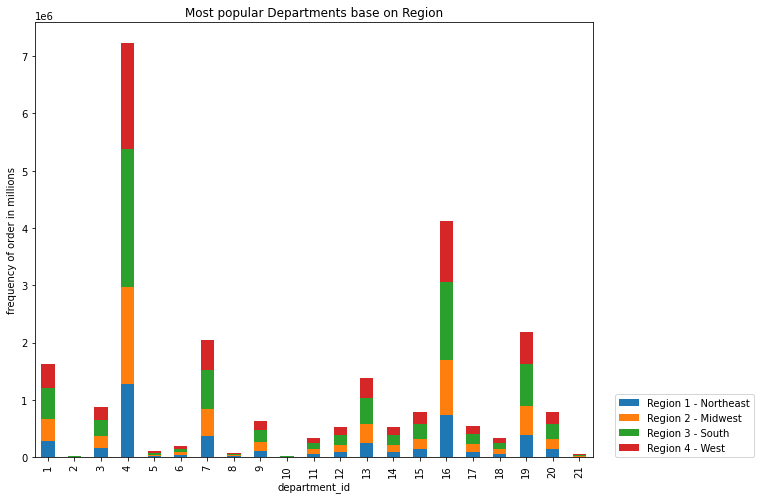

In [140]:
bar_region_department = crosstab_region_department.plot.bar(stacked= True).legend(loc=(1.04,0))
plt.ylabel('frequency of order in millions')
plt.title('Most popular Departments base on Region')